<center><h1>CNN + AE - Escenario experimental 3</header1></center>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
datapath = 'https://raw.githubusercontent.com/hfcatucuamba/proyectoInternetworking/main/Escenario3.csv'
names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']
dataframe = pd.read_csv(datapath,names=names,low_memory=False, sep=';')

In [4]:
dataframe.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2,7,4,1,1,3,NaN,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864.748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0


In [5]:
columna_a_codificar = dataframe['srcip']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['srcip'] = columna_codificada

In [6]:
columna_a_codificar = dataframe['dstip']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dstip'] = columna_codificada

In [7]:
columna_a_codificar = dataframe['dsport']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dsport'] = columna_codificada

In [8]:
columna_a_codificar = dataframe['proto']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['proto'] = columna_codificada

In [9]:
columna_a_codificar = dataframe['state']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['state'] = columna_codificada

In [10]:
columna_a_codificar = dataframe['dur']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dur'] = columna_codificada

In [11]:
columna_a_codificar = dataframe['service']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['service'] = columna_codificada

In [12]:
columna_a_codificar = dataframe['Sload']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sload'] = columna_codificada

In [13]:
columna_a_codificar = dataframe['Dload']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Dload'] = columna_codificada

In [14]:
columna_a_codificar = dataframe['Sjit']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sjit'] = columna_codificada

In [15]:
columna_a_codificar = dataframe['Djit']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Djit'] = columna_codificada

In [16]:
columna_a_codificar = dataframe['Sintpkt']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sintpkt'] = columna_codificada

In [17]:
columna_a_codificar = dataframe['Dintpkt']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Dintpkt'] = columna_codificada

In [18]:
columna_a_codificar = dataframe['ct_ftp_cmd']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['ct_ftp_cmd'] = columna_codificada

In [19]:
columna_a_codificar = dataframe['attack_cat']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['attack_cat'] = columna_codificada

In [20]:
# Separar las características del conjunto de datos en una matriz separada
X = dataframe.iloc[:, :-1].values

In [21]:
# Escalar características
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [22]:
y = dataframe['label']

In [23]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.layers import Reshape, UpSampling1D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import EarlyStopping

# Encoder
model = Sequential([
    Conv1D(64, 3, input_shape=(X_train.shape[1], 1), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
    MaxPooling1D(2),
    Dropout(0.3),
    Conv1D(32, 3, padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
    MaxPooling1D(2),
    Dropout(0.3),
    Conv1D(16, 3, padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
    MaxPooling1D(2),
    Dropout(0.3),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam",
              loss="binary_crossentropy", 
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 32)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 32)            0

In [25]:
batch_size = 32
steps_per_epoch = (X_train.shape[0]//batch_size)
validation_steps = (X.shape[0] // batch_size)

es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=200)

In [26]:
%%time

# Entrenar el modelo
model.fit(X_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 35,
    validation_data=(X_test, y_test),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

Epoch 1/35
65/65 [==============================] - 4s 43ms/step - loss: nan - accuracy: 0.4918 - val_loss: nan - val_accuracy: 0.5211
Epoch 2/35
65/65 [==============================] - 1s 12ms/step - loss: nan - accuracy: 0.4894
Epoch 3/35
65/65 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.4966
Epoch 4/35
65/65 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.4869
Epoch 5/35
65/65 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.4869
Epoch 6/35
65/65 [==============================] - 1s 12ms/step - loss: nan - accuracy: 0.4932
Epoch 7/35
65/65 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.4927
Epoch 8/35
65/65 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.4908
Epoch 9/35
65/65 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.4860
Epoch 10/35
65/65 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.4903


In [27]:
# Evaluar rendimiento del modelo en datos de prueba
loss, accuracy = model.evaluate(X_test,y_test,batch_size=batch_size)
print('test_loss: %.2f' % (loss * 100.0))  
print('test_accuracy: %.2f' % (accuracy * 100.0))

29/29 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5211
test_loss: nan
test_accuracy: 52.11


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# predecir probabilidades de modelo para datos de prueba
model_probs = model.predict(X_test, verbose=0)
# predecir clases para datos de prueba
model_classes = np.argmax(model_probs,axis=1)
# reducir a un array de 1 dimensión
model_probs = model_probs[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, model_classes)*100
# precision tp / (tp + fp)
precision = precision_score(y_test, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(y_test, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)
print('Recall: %.2f' % recall)

Accuracy: 52.11
F1 score: 35.71
Precision: 27.16
Recall: 52.11
Recall: 52.11


C:\Users\Holger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grafico Roc Curve

29/29 [==============================] - 0s 5ms/step


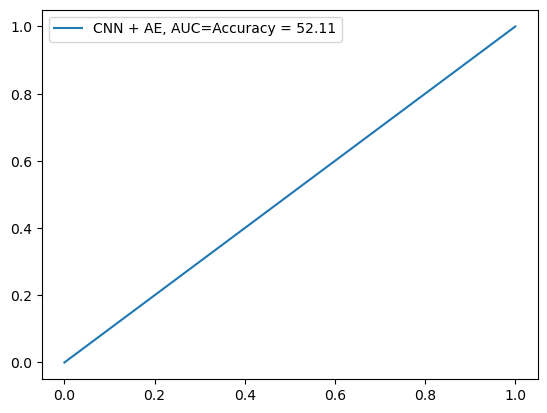

In [29]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
CNN = "Accuracy = {:.2f}".format(accuracy*100)
plt.plot(fpr, tpr, label="CNN + AE, AUC=" + str(CNN))
plt.legend()